# 基于支持向量机的Digits手写数字识别

1、加载查看Digits数据集

(1797, 64) (1797,)


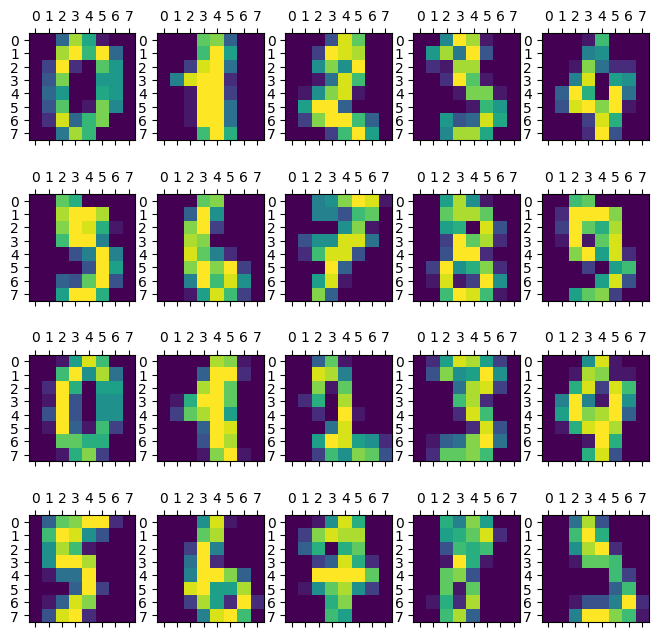

In [4]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# 加载Digits数据集
digits = load_digits()
data = digits.data # 样本数据
target = digits.target # 标签数据
print(data.shape, target.shape) # 输出数组形状

# 使用Matplotlib，显示前20张图片
fig = plt.figure(figsize=(8, 8), facecolor='w')
for i in range(20):
    ax = fig.add_subplot(4, 5, i+1) 
    # matshow方法将像素矩阵显示为图片
    # data中的图片像素为长度64的一维数组，需要转成8*8的二维数组来显示
    ax.matshow(data[i].reshape(8, 8))
    
plt.show()

## 2、拆分数据集、创建模型

In [5]:
# 拆分数据集
X_train, X_test, y_train, y_test = train_test_split(data, target, 
                                                    test_size=0.25, random_state=0)
print(X_train.shape, X_test.shape)

# 创建模型，拟合训练数据
# model = SVC().fit(X_train, y_train) # 默认参数准确率不高
#svm.SVC()中比较重要的参数C和gamma
# c是惩罚系数默认1.0，C 过高容易过拟合，C 过小容易欠拟合。
#gamma参数是SVM中的核函数参数，用于控制模型的灵活性和复杂度。
#gamma参数越小，模型越简单，适用于线性可分的问题；gamma越大，模型越复杂，适用于非线性可分的问题。
#gamma也会影响支持向量的选择，低值会导致选择远离决策边界的支持向量，高值则会选择更接近边界的支持向量。因此，gamma也是需要谨慎选择的参数。
#gamma=‘scale’ 默认值时是  1 / (样本特征数*样本方差)

model = SVC(gamma='scale').fit(X_train, y_train) # 指定参数,其中gamma默认为‘scale’核函数系数

# 评估模型
score = model.score(X_test, y_test)
print('score: ', score)

# 预测结果并与实际结果对比(预测测试集前20张图片)
y_pred = model.predict(X_test[:20])
print('预测数字：', y_pred)
print('实际数字：', y_test[:20])

(1347, 64) (450, 64)
score:  0.9911111111111112
预测数字： [2 8 2 6 6 7 1 9 8 5 2 8 6 6 6 6 1 0 5 8]
实际数字： [2 8 2 6 6 7 1 9 8 5 2 8 6 6 6 6 1 0 5 8]


## 3、使用其他分类模型实现

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

# 定义多个分类模型，加入字典中
models = {}
models['逻辑回归'] = LogisticRegression(max_iter=10000) # 逻辑回归
models['决策树'] = DecisionTreeClassifier() # 决策树
models['随机森林'] = RandomForestClassifier(100) # 集成算法-随机森林
models['K-最近邻'] = KNeighborsClassifier(n_neighbors=3) # K-最近邻
models['支持向量机'] = SVC(gamma='scale') # 支持向量机

# 循环拟合数据，评估模型成绩
for key, value in models.items():
    model = value.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print('{} :{:0.2f}'.format(key, score))
    

逻辑回归 :0.95
决策树 :0.85
随机森林 :0.98
K-最近邻 :0.99
支持向量机 :0.99
